In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import chardet  # Detect encoding

In [17]:
# get data
with open('data/data.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

df = pd.read_csv('data/data.csv',encoding = encoding,low_memory = False)

In [6]:
df.columns

Index(['#', 'Scheme Name', 'Net Asset Value', 'Outstanding Number of Units',
       'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit',
       'Date Valued'],
      dtype='object')

In [18]:
# fix column names
df.columns = df.columns.str.replace(" ", "")
df.columns = df.columns.str.replace("/", "")
df.columns = df.columns.str.replace("SalePriceperUnit", "SalePricePerUnit")
df.columns

Index(['#', 'SchemeName', 'NetAssetValue', 'OutstandingNumberofUnits',
       'NavPerUnit', 'SalePricePerUnit', 'RepurchasePriceUnit', 'DateValued'],
      dtype='object')

In [19]:
df.head()

,#,SchemeName,NetAssetValue,OutstandingNumberofUnits,NavPerUnit,SalePricePerUnit,RepurchasePriceUnit,DateValued
0,1,Umoja Fund,"397,788,850,422.5010","331,528,811.5353","1,199.8621","1,199.8621","1,187.8635",15-07-2025
1,2,Wekeza Maisha Fund,"24,767,597,644.6848","23,412,374.5720","1,057.8849","1,057.8849","1,036.7272",15-07-2025
2,3,Watoto Fund,"32,590,371,554.8241","41,685,206.8298",781.8210,781.8210,774.0028,15-07-2025
3,4,Jikimu Fund,"39,639,788,661.7014","207,241,732.4408",191.2732,191.2732,187.4477,15-07-2025
4,5,Liquid Fund,"1,921,808,923,001.7900","4,126,267,318.1562",465.7500,465.7500,465.7500,15-07-2025


In [20]:
# fix dates
df['DateValued2'] = pd.to_datetime(df['DateValued'], dayfirst=True, errors='coerce')
#df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.head()

,#,SchemeName,NetAssetValue,OutstandingNumberofUnits,NavPerUnit,SalePricePerUnit,RepurchasePriceUnit,DateValued,DateValued2
0,1,Umoja Fund,"397,788,850,422.5010","331,528,811.5353","1,199.8621","1,199.8621","1,187.8635",15-07-2025,2025-07-15
1,2,Wekeza Maisha Fund,"24,767,597,644.6848","23,412,374.5720","1,057.8849","1,057.8849","1,036.7272",15-07-2025,2025-07-15
2,3,Watoto Fund,"32,590,371,554.8241","41,685,206.8298",781.8210,781.8210,774.0028,15-07-2025,2025-07-15
3,4,Jikimu Fund,"39,639,788,661.7014","207,241,732.4408",191.2732,191.2732,187.4477,15-07-2025,2025-07-15
4,5,Liquid Fund,"1,921,808,923,001.7900","4,126,267,318.1562",465.7500,465.7500,465.7500,15-07-2025,2025-07-15


In [22]:
def clean_numeric_columns(df):
    for col in df.columns:
        # Skip if column is explicitly non-numeric (like text columns you want to preserve)
        if df[col].dtype == 'object':
            # First check if the column contains any numeric values
            if df[col].str.contains(r'^-?\d*\.?\d+$', regex=True).any():
                # Only process columns that appear to contain numbers
                cleaned = df[col].str.replace(',', '', regex=True)
                # Convert to numeric, but keep original strings where conversion fails
                df[col] = pd.to_numeric(cleaned, errors='ignore')

    return df

In [25]:
# Calculate profit and profit margin
df = clean_numeric_columns(df)
df = df.astype({'SalePricePerUnit': float, 'RepurchasePriceUnit': float, 'OutstandingNumberofUnits':float})

df["Profit"] = df["SalePricePerUnit"] - df["RepurchasePriceUnit"]
df["ProfitMargin"] = (df["Profit"] / df["SalePricePerUnit"]) * 100
df.head()

,#,SchemeName,NetAssetValue,OutstandingNumberofUnits,NavPerUnit,SalePricePerUnit,RepurchasePriceUnit,DateValued,DateValued2,Profit,ProfitMargin
0,1,Umoja Fund,"397,788,850,422.5010",3.315288e+08,1199.8621,1199.8621,1187.8635,15-07-2025,2025-07-15,11.9986,0.999998
1,2,Wekeza Maisha Fund,"24,767,597,644.6848",2.341237e+07,1057.8849,1057.8849,1036.7272,15-07-2025,2025-07-15,21.1577,2.000000
2,3,Watoto Fund,"32,590,371,554.8241",4.168521e+07,781.8210,781.8210,774.0028,15-07-2025,2025-07-15,7.8182,0.999999
3,4,Jikimu Fund,"39,639,788,661.7014",2.072417e+08,191.2732,191.2732,187.4477,15-07-2025,2025-07-15,3.8255,2.000019
4,5,Liquid Fund,"1,921,808,923,001.7900",4.126267e+09,465.7500,465.7500,465.7500,15-07-2025,2025-07-15,0.0000,0.000000


In [26]:
df['SchemeName'].value_counts()

SchemeName
Jikimu Fund           2722
Wekeza Maisha Fund    2718
Umoja Fund            2714
Liquid Fund           2709
Watoto Fund           2707
Bond Fund             1343
Name: count, dtype: int64

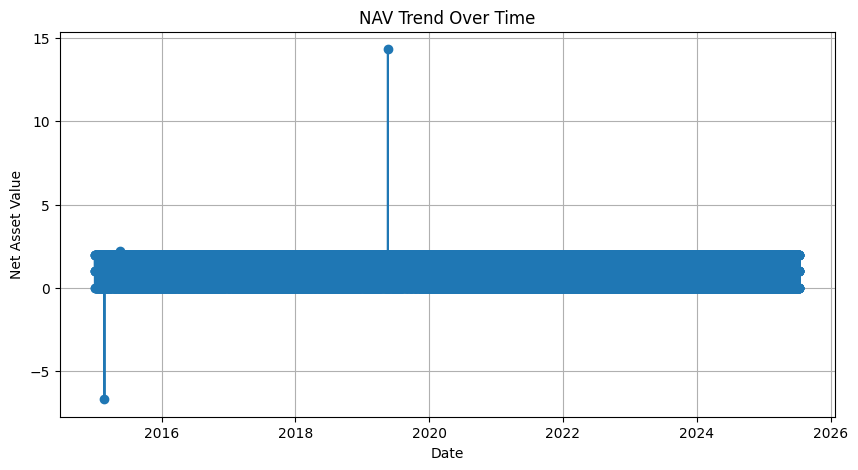

In [28]:
# Plot NAV trend

plt.figure(figsize=(10,5))
plt.plot(df["DateValued2"], df["ProfitMargin"], marker='o', linestyle='-')
plt.title("NAV Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Net Asset Value")
plt.grid()
plt.show()